# Section 1: Group Comparisons with Continuous Data

This exercise will be done in Python. You need to answer all questions to get full points for completing the lab.

**1. Read the males_ht_wt_cntry.csv file into a data frame.**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv('males_ht_wt_cntry.csv')

**2. Examine the data.**

a. Display some rows to make sure it imported correctly.

In [14]:
print(df.head())

   Height  Weight Country
0    64.0   144.0   Italy
1    68.0   150.0   Italy
2    66.0   147.0   Italy
3    71.0   170.0   Italy
4    65.0   163.0   Italy


b. Generate histograms of the heights by country.

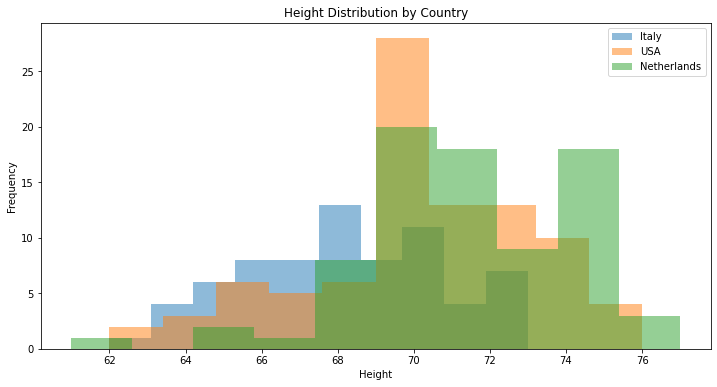

In [15]:
plt.figure(figsize = (12, 6))
for country in df['Country'].unique():
    plt.hist(df[df['Country'] == country]['Height'], alpha = 0.5, label = country)

plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Height Distribution by Country')
plt.legend()
plt.show()

c. Generate histograms of the weights by country.

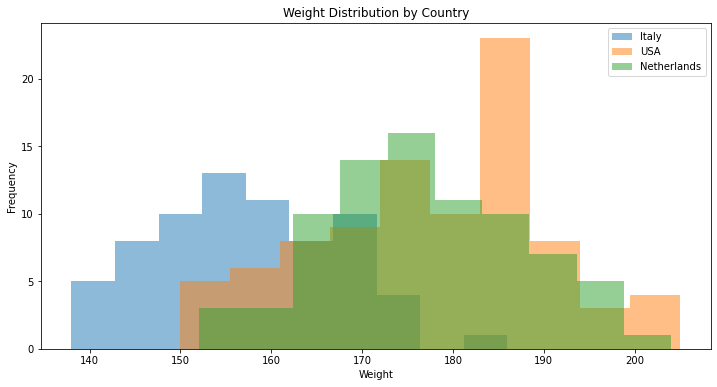

In [16]:
plt.figure(figsize = (12, 6))
for country in df['Country'].unique():
    plt.hist(df[df['Country'] == country]['Weight'], alpha = 0.5, label = country)

plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution by Country')
plt.legend()
plt.show()

**3. Conduct an ANOVA test to determine if the weights differ by nationality and interpret your results. Use this link as a reference. Make sure you use Levene’s test to check if the variance is close to equal.**

In [17]:
groups = [df[df['Country'] == country]['Weight'] for country in df['Country'].unique()]
levene_test = stats.levene(*groups)

if levene_test.pvalue > 0.05:
    print("Variances are approximately equal (p-value > 0.05). Proceed with ANOVA.")
    anova_result = stats.f_oneway(*groups)
    if anova_result.pvalue < 0.05:
        print("ANOVA test indicates that there is a significant difference in weights by nationality.")
    else:
        print("ANOVA test does not indicate a significant difference in weights by nationality.")
else:
    print("Variances are not equal (p-value < 0.05). ANOVA assumptions may be violated.")

Variances are approximately equal (p-value > 0.05). Proceed with ANOVA.
ANOVA test indicates that there is a significant difference in weights by nationality.


**4. ANOVA won’t tell you which sets of weights differ. You will need to compare each group against each other to determine that. Use this link as a reference.**

a. Conduct a test to determine if the weights of the Italian males were significantly different than the Dutch males (from the Netherlands) and interpret your results.

In [18]:
italian_weights = df[df['Country'] == 'Italy']['Weight']
dutch_weights = df[df['Country'] == 'Netherlands']['Weight']
t_stat, p_value = stats.ttest_ind(italian_weights, dutch_weights)

if p_value < 0.05:
    print("The weights of Italian males are significantly different from Dutch males (p-value < 0.05).")
else:
    print("There is no significant difference in weights between Italian and Dutch males (p-value >= 0.05).")

The weights of Italian males are significantly different from Dutch males (p-value < 0.05).


b. Conduct a test to determine if the weights of the American males were significantly different than the Dutch males (from the Netherlands) and interpret your results.

In [21]:
american_weights = df[df['Country'] == 'USA']['Weight']
t_stat, p_value = stats.ttest_ind(american_weights, dutch_weights)

if p_value < 0.05:
    print("The weights of American males are significantly different from Dutch males (p-value < 0.05).")
else:
    print("There is no significant difference in weights between American and Dutch males (p-value >= 0.05).")

There is no significant difference in weights between American and Dutch males (p-value >= 0.05).


**5. Conducting multiple tests like this increases the odds of getting false significant results. If you had conducted tests for 3 comparisons (Italian vs Dutch, Italian vs American, American vs Dutch), what is the probability one of these t-tests is not actually significant (i.e. false positive)?**

In [22]:
alpha = 0.05
num_comparisons = 3
fw_error_rate = 1 - (1 - alpha) ** num_comparisons

print(f"The probability of at least one false positive is approximately {fw_error_rate:.4f}")

The probability of at least one false positive is approximately 0.1426


**6. When comparing these groups, it’s better to control the FWER. Use a multiple comparison procedure with a Tukey adjustment. See this link for how to do this in Python using the pairwise_tukeyhsd() function.**

In [23]:
tukey_result = pairwise_tukeyhsd(df['Weight'], df['Country'])

print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj  lower   upper  reject
-------------------------------------------------------------
      Italy Netherlands  19.2839 0.001 14.8583 23.7095   True
      Italy         USA  20.0048 0.001 15.6954 24.3141   True
Netherlands         USA   0.7208   0.9 -3.4342  4.8759  False
-------------------------------------------------------------


# Section 2: Group Comparisons with Categorical Data

**1. Create a new BMI column. Use the Imperial formula.**

In [34]:
df['BMI'] = (df['Weight'] * 703 / (df['Height'] ** 2))

print(df['BMI'])

0      24.714844
1      22.804931
2      23.723829
3      23.707598
4      27.121657
         ...    
235    23.108997
236    23.613624
237    25.987818
238    23.528980
239    27.517950
Name: BMI, Length: 240, dtype: float64


**2. Create another new column ‘Overweight’ that is a 1 if BMI >= 25 and 0 otherwise. There are several ways to do this in Python.**

In [41]:
df['Overweight'] = (df['BMI'] >= 25).astype(int)

print(df['Overweight'])

0      0
1      0
2      0
3      0
4      1
      ..
235    0
236    0
237    1
238    0
239    1
Name: Overweight, Length: 240, dtype: int64


**3. Create a contingency table of overweight by nationality and examine it. Describe any differences you see between nationalities.**

In [27]:
contingency_table = pd.crosstab(df['Overweight'], df['Country'])

print(contingency_table)

Country     Italy  Netherlands  USA
Overweight                         
0              54           48   38
1              16           32   52


**4. Conduct a Chi-Sq test using scipy.stats to see if the differences are significant. Explain your findings.**

In [45]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)

if p_val < 0.05:
    print("The differences in overweight status by nationality are statistically significant.")
else:
    print("There is no significant difference in overweight status by nationality.")

Chi-Square Statistic: 19.892244897959184
P-value: 4.79130595387623e-05
Degrees of Freedom: 2
The differences in overweight status by nationality are statistically significant.


# Section 3: Regression

**1. Build a linear regression of to see whether height predicts weight. There are two main modules for conducting linear regression in Python. Use statsmodels. Explain the results.**

In [29]:
X = df['Height']
y = df['Weight']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           3.82e-25
Time:                        19:02:36   Log-Likelihood:                -927.86
No. Observations:                 240   AIC:                             1860.
Df Residuals:                     238   BIC:                             1867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.2547     17.138     -1.649      0.1

/Users/wry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**2. Fit the same regression model using linear algebra. Compare your resultant $\beta$ 's to the ones you obtained earlier.**

In [51]:
X = df['Height']
y = df['Weight']

X = np.column_stack((np.ones(len(X)), X))

beta = np.linalg.inv(X.T @ X) @ X.T @ y

print("Intercept (\u03B2\u2080):", beta[0])
print("Coefficient for height (\u03B2\u2081):", beta[1])

Intercept (β₀): -28.25470172940304
Coefficient for height (β₁): 2.8536531102607694
